In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


%matplotlib inline

In [16]:
cardf = pd.read_csv("dataset.csv")

In [17]:
cardf

,CarNo,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [18]:
cardf.shape

(6019, 14)

In [19]:
cardf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CarNo              6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [20]:
cardf.describe()

,CarNo,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [21]:
cardf.columns

Index(['CarNo', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price'],
      dtype='object')

In [22]:
print(cardf.Fuel_Type.value_counts())

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64


In [23]:
print(cardf.Transmission.value_counts())

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64


In [24]:
print(cardf.Owner_Type.value_counts())

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64


In [25]:
cardf.replace({'Fuel_Type':{'Petrol':1,'Diesel':0,'CNG':2,'LPG':3,'Electric':4}},inplace=True)

cardf.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

cardf.replace({'Owner_Type':{'First':0,'Second':1,'Third':2,'Fourth & Above':3}},inplace=True)

In [26]:
cardf

,CarNo,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,2,0,0,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,0,0,0,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,1,0,0,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,0,0,0,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,0,1,1,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,0,0,0,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh,4.75
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,0,0,0,24.4 kmpl,1120 CC,71 bhp,5.0,NaN,4.00
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,0,0,1,14.0 kmpl,2498 CC,112 bhp,8.0,NaN,2.90
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,1,0,0,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN,2.65


In [43]:
x = cardf.drop(['CarNo', 'Name', 'Location', 'Seats','New_Price', 'Price','Mileage','Engine','Power'],axis=1)
y = cardf[ 'Price']

In [44]:
print(x)

      Year  Kilometers_Driven  Fuel_Type  Transmission  Owner_Type
0     2010              72000          2             0           0
1     2015              41000          0             0           0
2     2011              46000          1             0           0
3     2012              87000          0             0           0
4     2013              40670          0             1           1
...    ...                ...        ...           ...         ...
6014  2014              27365          0             0           0
6015  2015             100000          0             0           0
6016  2012              55000          0             0           1
6017  2013              46000          1             0           0
6018  2011              47000          0             0           0

[6019 rows x 5 columns]


In [45]:
print(y)

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64


In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=21)

In [58]:
#linear regression model
lrm = LinearRegression()

In [59]:
lrm.fit(x_train,y_train)

LinearRegression()

In [60]:
training_data_prediction = lrm.predict(x_train)

In [61]:
#error_score using r squared method

error_score = metrics.r2_score(y_train,training_data_prediction)
print("R squared error :: ",error_score)

R squared error ::  0.456048572126438


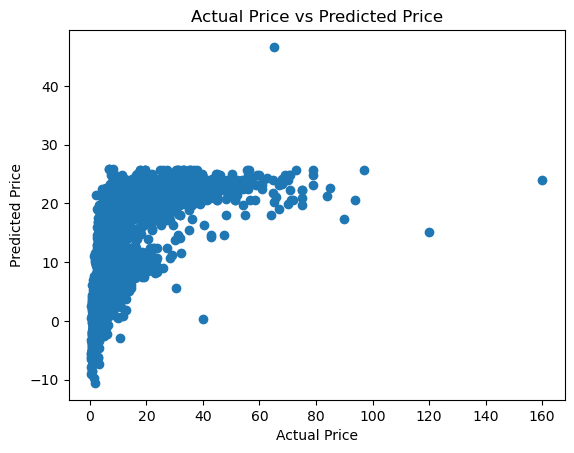

In [66]:
plt.scatter(y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [67]:
testing_data_prediction = lrm.predict(x_test)

In [68]:
#error_score using r squared method

error_score = metrics.r2_score(y_test,testing_data_prediction)
print("R squared error :: ",error_score)

R squared error ::  0.41722256172604855


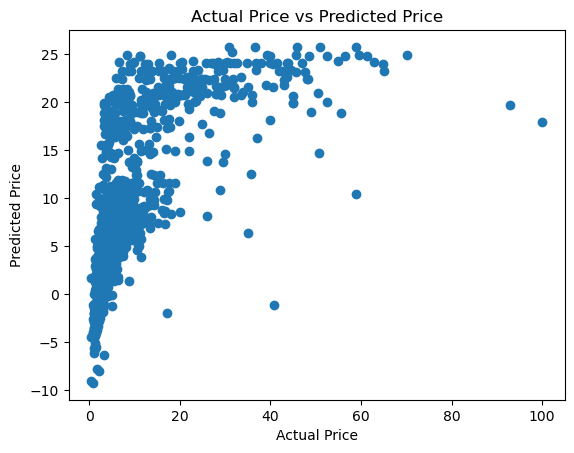

In [69]:
plt.scatter(y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

/var/folders/79/j_bf689j67d33r8g_4mv14mw0000gn/T/ipykernel_95689/3356847349.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((testing_data_prediction),bins=50);


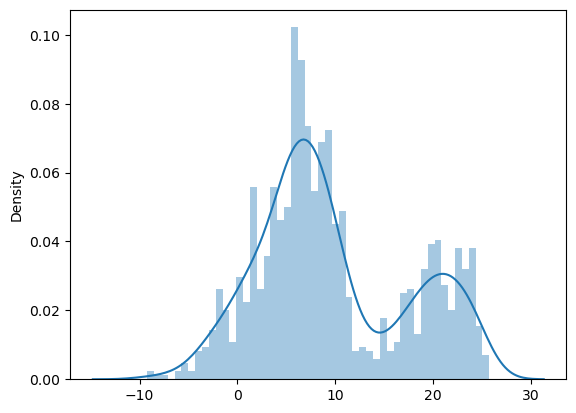

In [71]:
sns.distplot((testing_data_prediction),bins=50);